In [74]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
Pandas: 2.0.3
Numpy: 1.24.3
Sklearn: 1.2.2
Matplotlib: 3.7.4
Keras: 2.13.1


In [75]:
# read the csv file
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [76]:
# Normalization
normalizer = preprocessing.Normalizer()
normalized_data = normalizer.fit_transform(data)

print("Normalized Data:")
print(normalized_data)

Normalized Data:
[[0.17189073 0.00330559 0.         ... 0.00661118 0.00991677 0.        ]
 [0.1790044  0.00337744 0.         ... 0.         0.01013232 0.        ]
 [0.26115629 0.0037308  0.         ... 0.         0.01119241 0.        ]
 ...
 [0.14583409 0.00310285 0.         ... 0.00310285 0.00620571 0.        ]
 [0.15474167 0.         0.         ... 0.         0.00618967 0.00309483]
 [0.21108578 0.003909   0.         ... 0.003909   0.01172699 0.        ]]


In [77]:
data.shape

(1025, 14)

In [78]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [79]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [80]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [81]:
# Total Percentage of Missing Data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


/tmp/ipykernel_42/1015230891.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


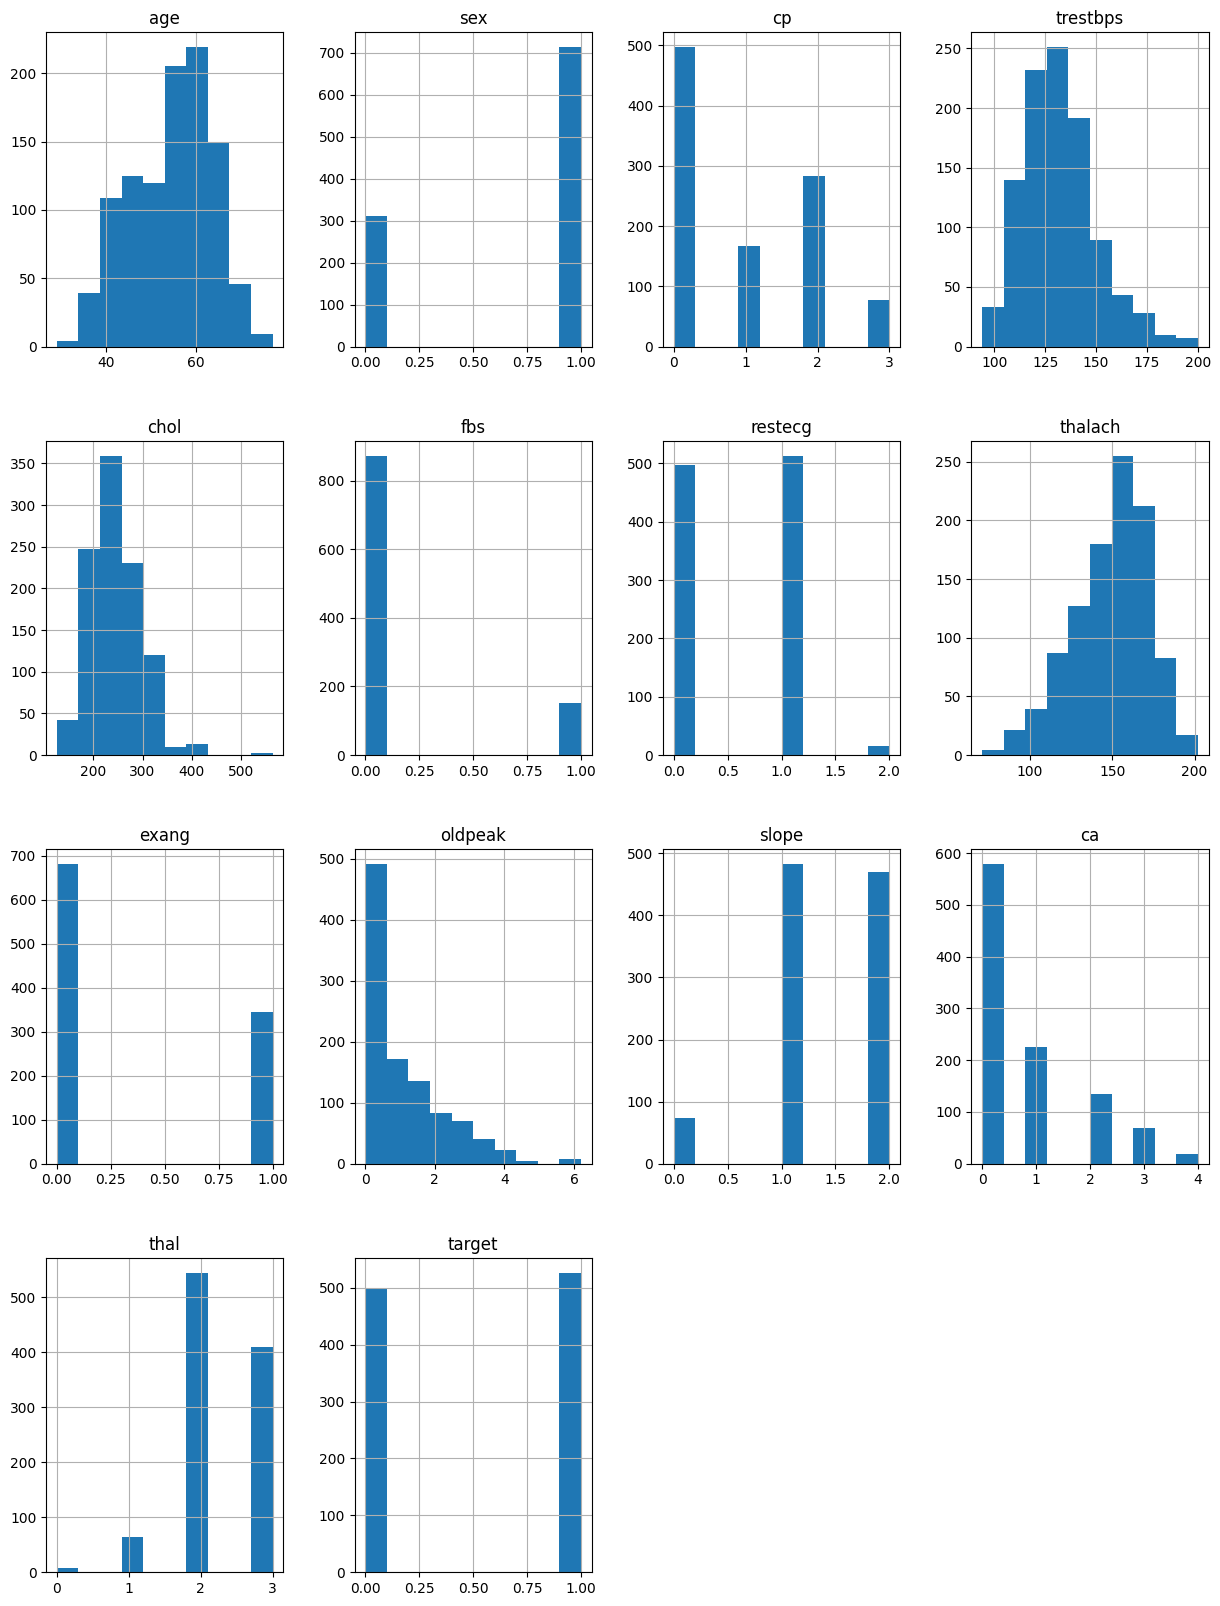

In [82]:
# Plot Histogram to See the Distribution of the Data

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

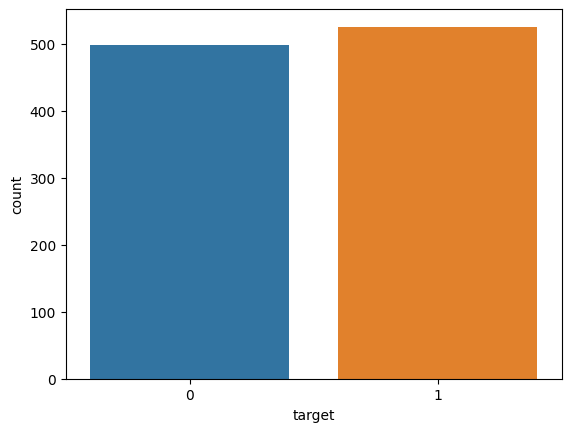

In [83]:
sns.countplot(x='target',data=data)
plt.show()

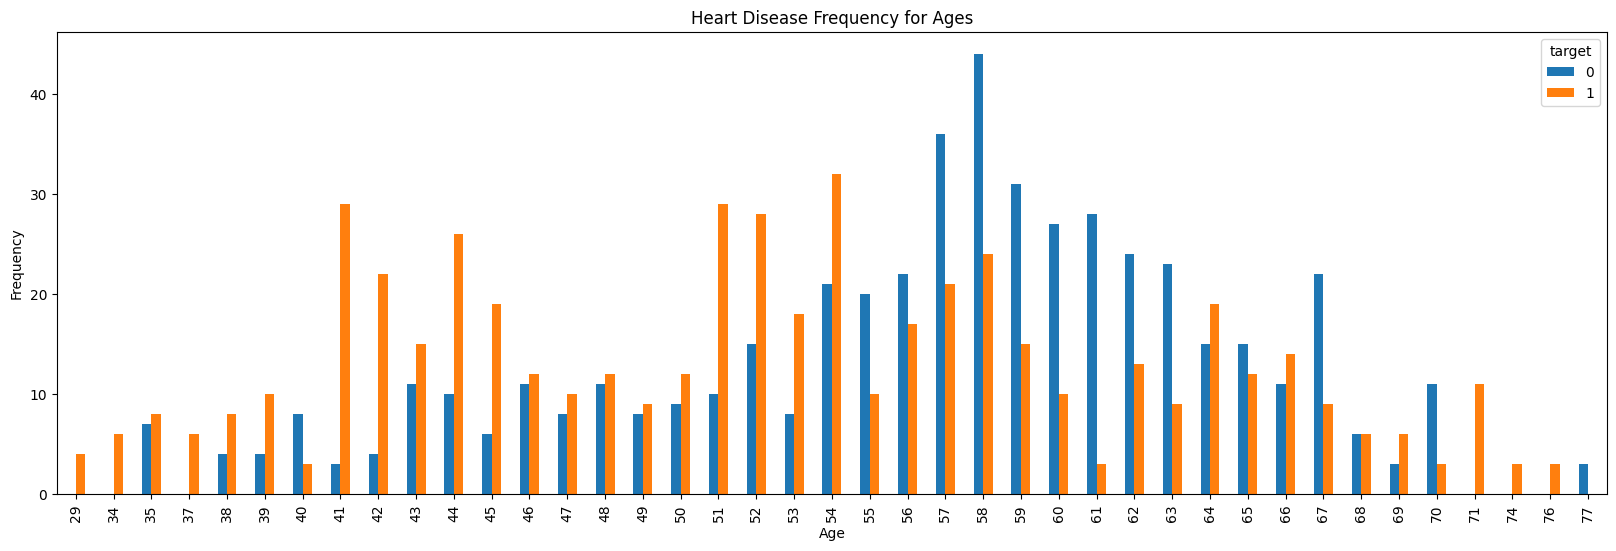

In [84]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

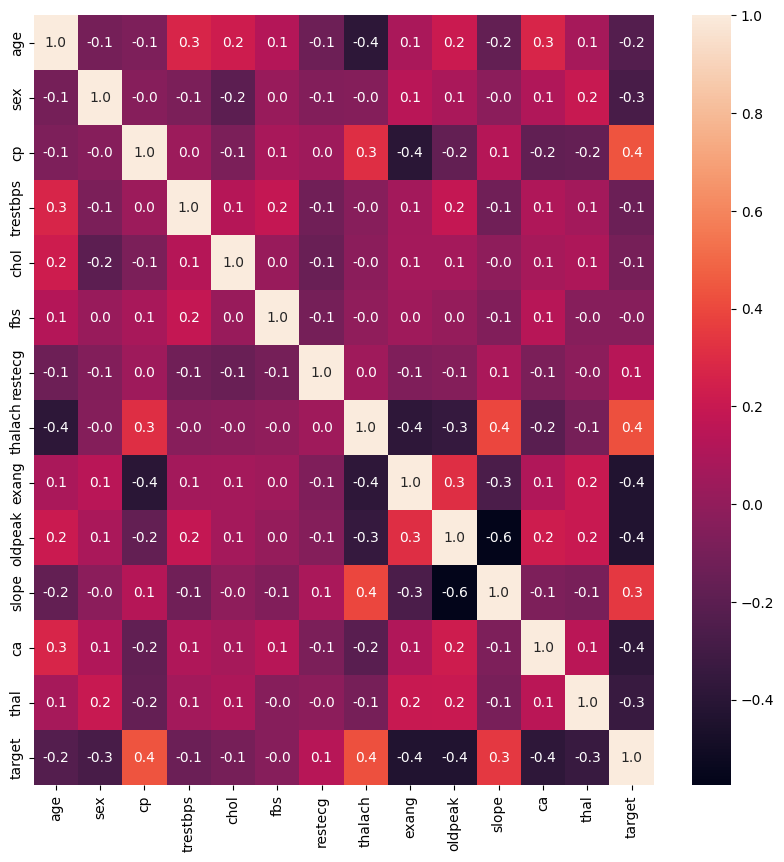

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [86]:
data.shape

(1025, 14)

In [87]:
X = np.array(data.drop(['target'],axis=1))
y = np.array(data['target'])

In [88]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [89]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [90]:
X.shape

(1025, 13)

In [91]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

In [92]:
# Initialize the scaler and normalize the training set
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

In [93]:
# Apply the same scaler to transform the test set
X_test_normalized = scaler.transform(X_test)

In [94]:
y_test.shape

(205,)

In [95]:
X_test_normalized.shape

(205, 13)

In [96]:
# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [97]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

In [98]:
model = Sequential()
model.add(Dense(64, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# compile model
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                896       
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_28 (Dense)            (None, 8)                

In [99]:
# fit the model to the test data
history=model.fit(X_train_normalized, Y_train, validation_data=(X_test_normalized, Y_test),epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 0.7113 - accuracy: 0.6561 - val_loss: 0.6971 - val_accuracy: 0.7610
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6699 - accuracy: 0.7902 - val_loss: 0.6332 - val_accuracy: 0.7659
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.8110 - val_loss: 0.5477 - val_accuracy: 0.7756
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4789 - accuracy: 0.8512 - val_loss: 0.4901 - val_accuracy: 0.8098
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8622 - val_loss: 0.4559 - val_accuracy: 0.8098
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3656 - accuracy: 0.8841 - val_loss: 0.4350 - val_accuracy: 0.8244
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3451 - accuracy: 0.8866 - val_loss: 0.4415 - val_accuracy: 0.8244
Epoch 8/50
13/13 [=

In [100]:
acc = model.evaluate(X_test_normalized, Y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")

7/7 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9415
Loss:      21.27%

Accuracy:  94.15%



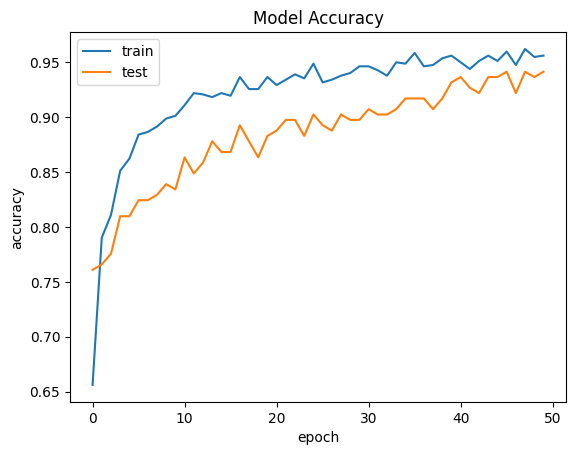

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

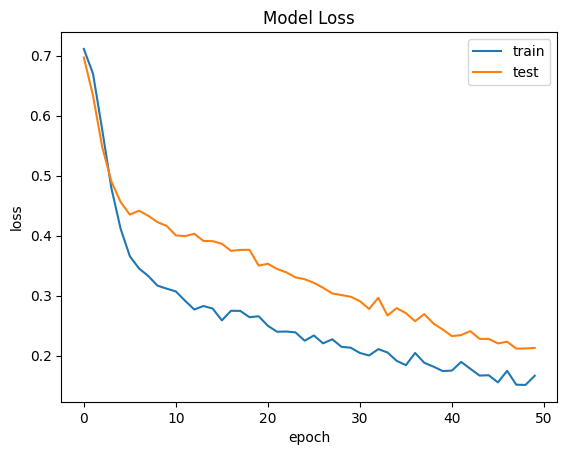

In [102]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [103]:
# generate classification report using predictions for categorical model

categorical_pred = np.argmax(model.predict(X_test_normalized), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 2ms/step
Results for Categorical Model
0.9414634146341463
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       102
           1       0.97      0.91      0.94       103

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


from tensorflow.keras.models import Model

# Extract features from intermediate layer
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('dense_28').output)
features_train = intermediate_layer_model.predict(X_train_normalized)
features_test = intermediate_layer_model.predict(X_test_normalized)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(features_train, Y_train)

cnn_predictions = model.predict(X_test_normalized)
knn_predictions = knn_model.predict(features_test)
acc=accuracy_score(knn_predictions,Y_test)


7/7 [==============================] - 0s 2ms/step


In [106]:
print(acc)

0.9512195121951219
